In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam, Adamax
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Read the data

In [ ]:
# Reading CSV file
train=pd.read_csv("/content/gdrive/MyDrive/Train_hindi.csv").astype('float32')
test=pd.read_csv("/content/gdrive/MyDrive/Test_hindi.csv").astype('float32')


# There are in total 372450 images each of size 28 X 28
# Each row in the CSV file contains one image flattern in a vector of size 784
train=np.array(train)
test=np.array(test)


# Shuffling the data
train=shuffle(train)
test=shuffle(test)

print("train_data: ")
print()
print(train)

print()
print()

print("test_data: ")
print()
print(test)

train_data: 

[[68.  0.  0. ...  0.  0.  0.]
 [63.  0.  0. ...  0.  0.  0.]
 [91.  0.  0. ...  0.  0.  0.]
 ...
 [79.  0.  0. ...  0.  0.  0.]
 [96.  0.  0. ...  0.  0.  0.]
 [70.  0.  0. ...  0.  0.  0.]]


test_data: 

[[85.  0.  0. ...  0.  0.  0.]
 [65.  0.  0. ...  0.  0.  0.]
 [62.  0.  0. ...  0.  0.  0.]
 ...
 [66.  0.  0. ...  0.  0.  0.]
 [64.  0.  0. ...  0.  0.  0.]
 [64.  0.  0. ...  0.  0.  0.]]


# Split the data into image and their labels

In [ ]:
# As it is seen that '0' column contains labels (0,61).
# Split data into images and their labels
train_x=train[:,1:785]
train_y=train[:,0]
test_x=test[:,1:785]
test_y=test[:,0]

print("train_x: ", train_x.shape)
print()
print(train_x)
print()

print("test_x",test_x.shape)
print()
print(test_x)
print()

print("train_y",train_y.shape)
print()
print(train_y)
print()

print("test_y",test_y.shape)
print()
print(test_y)
print()

train_x:  (61199, 784)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test_x (10799, 784)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

train_y (61199,)

[68. 63. 91. ... 79. 96. 70.]

test_y (10799,)

[85. 65. 62. ... 66. 64. 64.]



# Plotting the number of alphabets and digits in the dataset

train_y_integer:  [68 63 91 ... 79 96 70]
test_y_integer:  [85 65 62 ... 66 64 64]


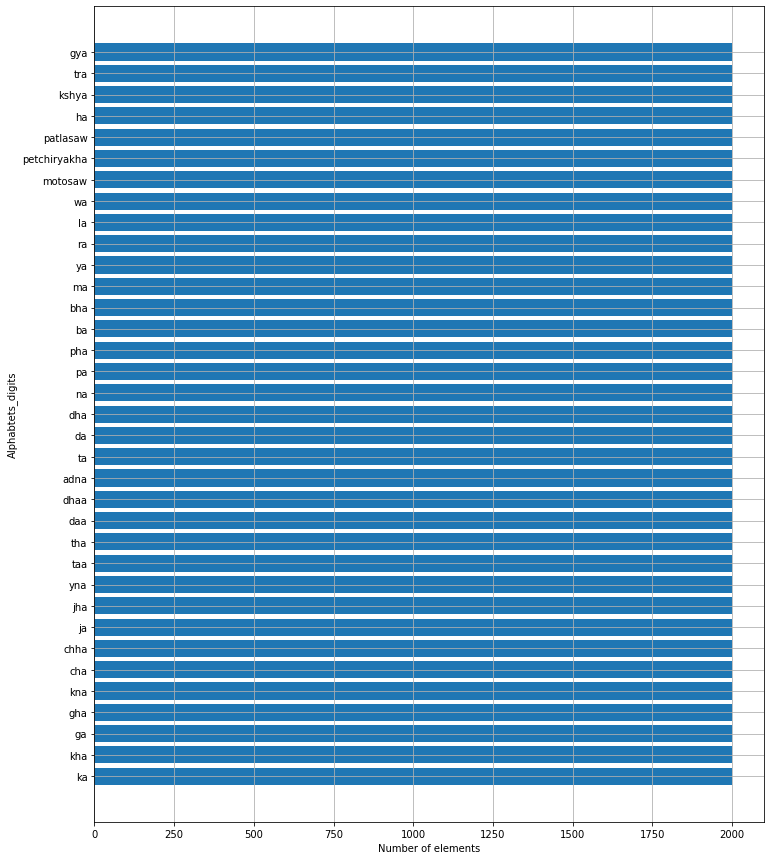

In [ ]:
# We create a dictionary word_dict to map the integer values with the characters.
word_dict = {62:'ka', 63:'kha', 64:'ga', 65:'gha', 66:'kna', 67:'cha', 68:'chha', 69:'ja',70:'jha',
       71:'yna', 72:'taa', 73:'tha', 74:'daa', 75:'dhaa', 76:'adna', 77:'ta', 78:'tha',79:'da',
       80:'dha', 81:'na', 82:'pa', 83:'pha', 84:'ba', 85:'bha', 86:'ma', 87:'ya',88:'ra',
       89:'la', 90:'wa', 91:'motosaw', 92:'petchiryakha', 93:'patlasaw', 94:'ha', 95:'kshya', 96:'tra',97:'gya'}


# All the labels are present in the form of floating point values, that we convert to integer values.
# y_integer is a vector of 'integer values of y'
train_y_integer = np.int0(train_y)
test_y_integer = np.int0(test_y)
print("train_y_integer: ", train_y_integer)
print("test_y_integer: ", test_y_integer)


# 'count' is vector of size 26 which keeps count of how many times is that character present in dataset
count = np.zeros(36, dtype='int')
for i in train_y_integer:
    count[i-62] +=1
for i in test_y_integer:
    count[i-62] +=1

alphabets_digits = ['ka','kha','ga','gha','kna','cha','chha','ja','jha','yna','taa','tha','daa','dhaa','adna','ta','tha','da',
                    'dha','na','pa','pha','ba','bha','ma','ya','ra','la','wa','motosaw','petchiryakha','patlasaw','ha','kshya',
                    'tra','gya']


# Plotting the number of each alphabet in the dataset
fig, ax = plt.subplots(1,1, figsize=(12,15))
ax.barh(alphabets_digits, count)   #  'barh' is used to make a horizontal bar plot
plt.xlabel("Number of elements")
plt.ylabel("Alphabtets_digits")
plt.grid()
plt.show()

# Reshaping the Train and Test data

In [ ]:
# Reshaping the training & test DATA so that it can be put in the model
final_train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
print("New shape of train data: ", final_train_x.shape)

final_test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
print("New shape of train data: ", final_test_x.shape)
print()


# Reshaping the training & test LABELS so that it can be put in the model
   # to_categorial converts a class vector(integers) to binary class matrix
   # a = to_categorical([0, 1, 1, 3, 2], num_classes=4)
   # print(a)
   # [[1. 0. 0. 0.]
   # [0. 1. 0. 0.]
   # [0. 1. 0. 0.]
   # [0. 0. 0. 1.]
   # [0. 0. 1. 0.]]
final_train_y = to_categorical(train_y-62, num_classes = 36, dtype='int')  # numclass=62 because labels have values from 0 to 61 only
print("New shape of train labels: ", final_train_y.shape)

final_test_y = to_categorical(test_y-62, num_classes = 36, dtype='int')    # numclass=62 because labels have values from 0 to 61 only
print("New shape of test labels: ", final_test_y.shape)

New shape of train data:  (61199, 28, 28, 1)
New shape of train data:  (10799, 28, 28, 1)

New shape of train labels:  (61199, 36)
New shape of test labels:  (10799, 36)


# CNN Model

In [ ]:
# CNN model designed for training the model over the training dataset
model = Sequential()


# filters: filter consist of kernels
# activation: activation function to use
#             activation = relu (rectified linear activation function) 
#                          that will output the input directly if it is positive, otherwise, it will output zero.
# padding: one of "valid" or "same"  
#          valid: means no padding. 
#          same: results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width as the input.
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))


model.add(Flatten())


# Fully connected layers
model.add(Dense(256,activation ="relu"))
model.add(Dense(512,activation ="relu"))

# Dropout layer
model.add(Dropout(0.5))

# Softmax function for classification
model.add(Dense(36,activation ="softmax"))

# Compiling & Fitting the model

In [ ]:
# Compiling and fitting the model
model.compile(optimizer = Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(final_train_x, final_train_y, epochs=60,  validation_data = (final_test_x,final_test_y))

Epoch 1/60
1913/1913 [==============================] - 55s 6ms/step - loss: 4.3707 - accuracy: 0.1144 - val_loss: 1.3245 - val_accuracy: 0.6579
Epoch 2/60
1913/1913 [==============================] - 10s 5ms/step - loss: 1.5045 - accuracy: 0.5680 - val_loss: 0.6010 - val_accuracy: 0.8272
Epoch 3/60
1913/1913 [==============================] - 9s 5ms/step - loss: 0.7732 - accuracy: 0.7699 - val_loss: 0.3717 - val_accuracy: 0.8904
Epoch 4/60
1913/1913 [==============================] - 10s 5ms/step - loss: 0.5045 - accuracy: 0.8491 - val_loss: 0.2685 - val_accuracy: 0.9195
Epoch 5/60
1913/1913 [==============================] - 10s 5ms/step - loss: 0.3787 - accuracy: 0.8863 - val_loss: 0.2171 - val_accuracy: 0.9353
Epoch 6/60
1913/1913 [==============================] - 10s 5ms/step - loss: 0.2987 - accuracy: 0.9082 - val_loss: 0.1919 - val_accuracy: 0.9424
Epoch 7/60
1913/1913 [==============================] - 10s 5ms/step - loss: 0.2405 - accuracy: 0.9273 - val_loss: 0.1729 - val_acc

# Model summary

In [ ]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               8

# Prediction on test data

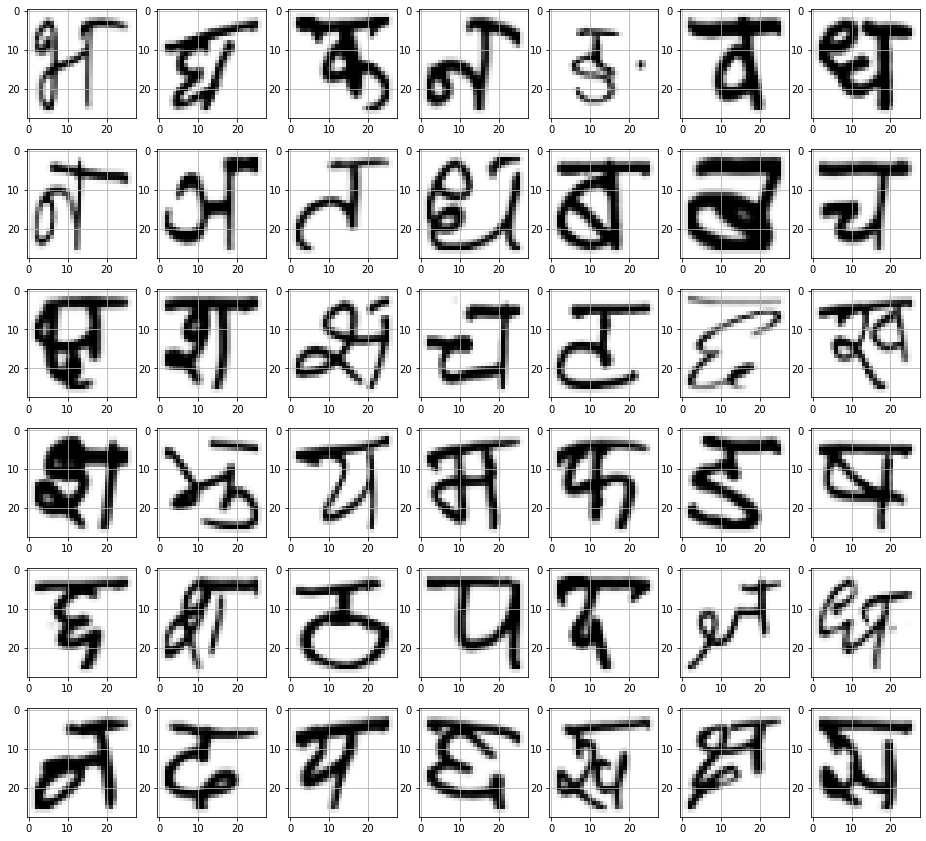

In [ ]:
# Prediction on test dataset
fig, axes = plt.subplots(6,7, figsize=(16,15))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(final_test_x[i], (28,28))
    #img=np.transpose(img)
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(final_test_y[i])+62]
    #ax.set_title("Prediction: "+pred)
    ax.grid()

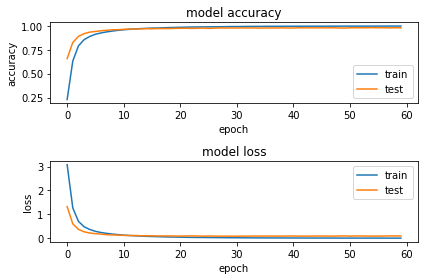

In [ ]:
# Plot accuracy vs epoch
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.yticks([0.65, 0.75, 0.85,1])
plt.legend(['train', 'test'], loc='lower right')

# Plot loss vs epoch
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

# No. of correct and incorrect predictions

In [ ]:
predicted_classes = model.predict_classes(final_test_x)


# find test images predicted correctly
correct = np.nonzero(predicted_classes + 62 == test_y_integer)[0]


# find test images predicted correctly
incorrect = np.nonzero(predicted_classes + 62 != test_y_integer)[0]

print()
print("Corretly classified images: ", len(correct))
print("Incorretly classified images: ", len(incorrect))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Corretly classified images:  10603
Incorretly classified images:  196


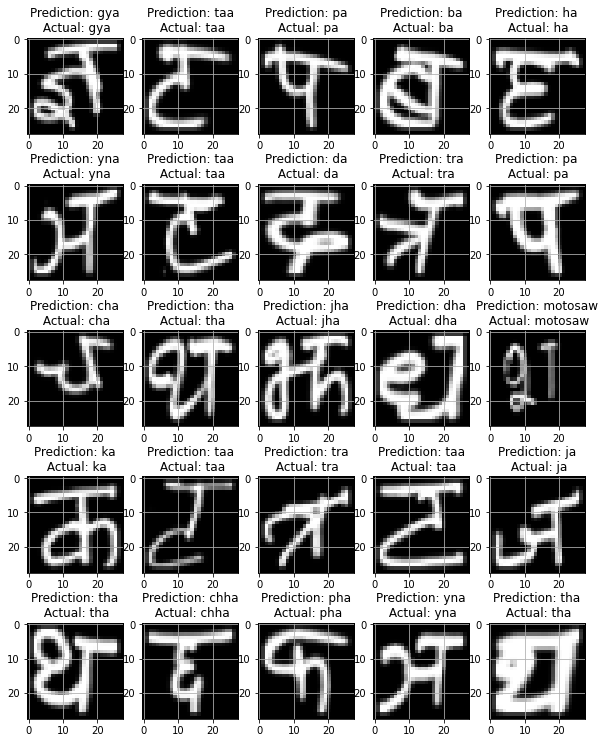

In [ ]:
# Printing few correctly predicting test images
fig, axes = plt.subplots(5,5, figsize=(10,13))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(final_test_x[correct[i]], (28,28))
    ax.imshow(img, cmap='gray')
    
    img = np.reshape(final_test_x[correct[i]], (1,28,28,1))
    pred=model.predict(img)
    ans=word_dict[np.argmax(pred) + 62]
    actual=word_dict[test_y_integer[correct[i]]]
    ax.set_title("Prediction: "+ ans +
                 "\n Actual: "+ actual)
    ax.grid()

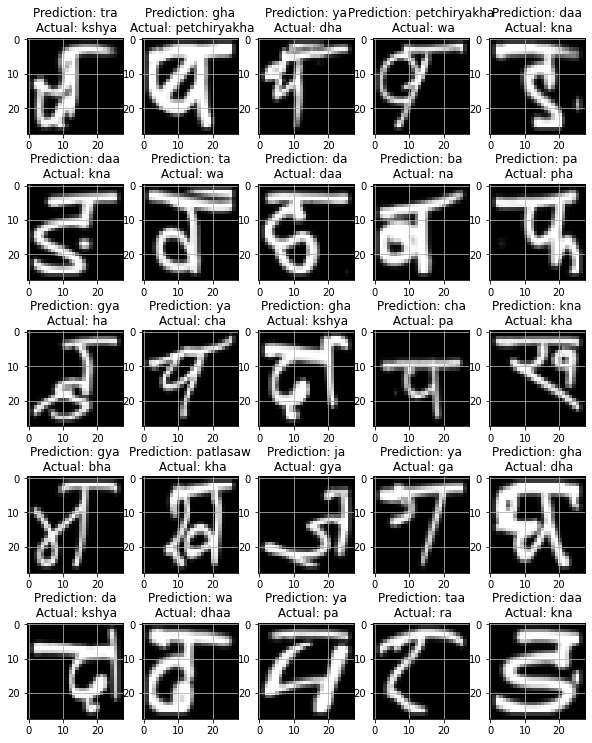

In [ ]:
# Printing few incorrectly predicting test images
fig, axes = plt.subplots(5,5, figsize=(10,13))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(final_test_x[incorrect[i]], (28,28))
    ax.imshow(img, cmap='gray')
    
    img = np.reshape(final_test_x[incorrect[i]], (1,28,28,1))
    pred=model.predict(img)
    ans=word_dict[np.argmax(pred) + 62]
    actual=word_dict[test_y_integer[incorrect[i]]]
    ax.set_title("Prediction: "+ ans +
                 "\n Actual: "+ actual)
    ax.grid()